<a href="https://colab.research.google.com/github/lomovtsevp/non-linear-dynamic-systems/blob/main/lab6_PZND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>***Ломовцев Павел ИМБО-01-19***

<font size=5>***Практика 6. Автоколебания в системах различной природы: генератор Ван-дер-Поля***

In [ ]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt

stat_dpi=90
dynamics_pics = (6, 3)
rect_pics = (3, 3)

Численное решение + фазовый портрет

In [ ]:
def plot_solution(y1, y2, time, color1 = "b", color2 = "green"):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = color1, label = "x")
    plt.plot(time, y2, c = color2, label = "y")
    plt.xlabel("time")          
    plt.ylabel("x, y")
    plt.title(f"Численное решение системы Ван-дер-Поля")
    plt.legend()
    plt.grid(True)              
    plt.show()

In [ ]:
def plot_phase_portrait(y1, y2, color = "b", starts = None, nulls = None):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1], c = color)
    if nulls is not None:
        for i in nulls:
            plt.scatter(i[0], i[1], c = color)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Фазовый портрет системы Ван-дер-Поля")
    plt.grid(True)
    plt.show()

Функция системы Ван-дер-Поля

In [ ]:
def vanderpol(y, t, mu=0.1):
  y1, y2 = y
  dy1, dy2 = y2, 2 * mu * y2 * (1 - y1 ** 2) - y1
  return [dy1, dy2]

Анализ системы

In [ ]:
def analyze(f, nulls, starts, mu=1,time_end = 100):
    time = np.linspace(0, time_end, 5000)
    print(f'mu = {mu}')
    for i in starts:
        print(f"В точке {i}")
        w = integr.odeint(f, i, time, (mu,))
        y1 = w[:, 0]
        y2 = w[:, 1]
        
        plot_solution(y1, y2, time)
        plot_phase_portrait(y1, y2, starts = [i], nulls = nulls)

Единственная особая точка данной системы: (*x**, *y**) = (0, 0).

Бифуркационное значение параметра *mu = 1*.

In [ ]:
starts = [[0, 0.5],
          [0.5, 2.5]]

nulls = [[0, 0]]

mu = 0.035
В точке [0, 0.5]


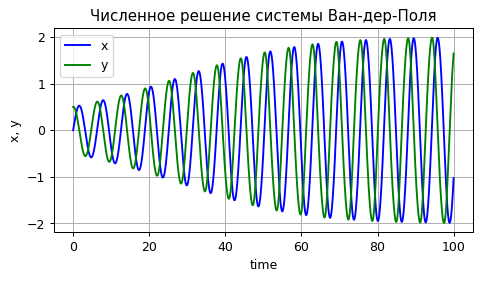

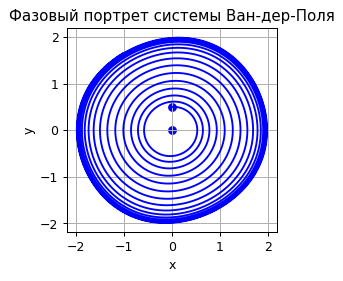

В точке [0.5, 2.5]


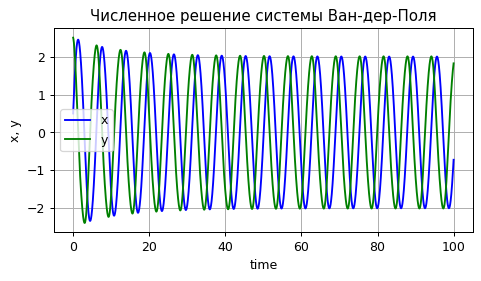

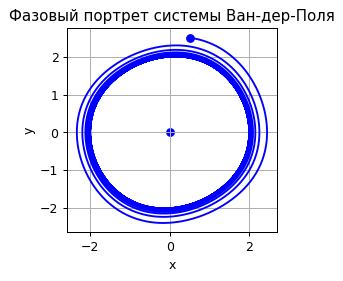

In [ ]:
analyze(vanderpol, nulls, starts, mu=0.035)

mu = 1.5
В точке [0, 0.5]


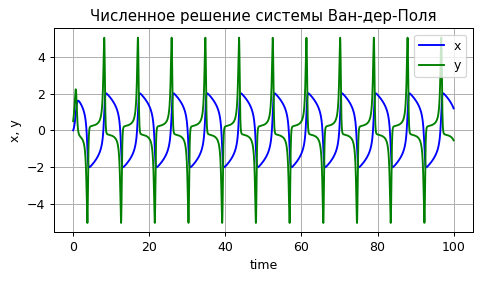

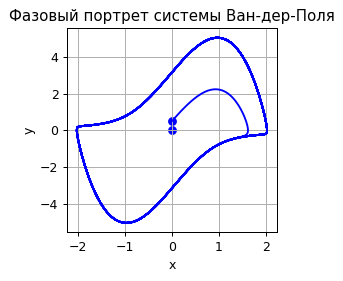

В точке [0.5, 2.5]


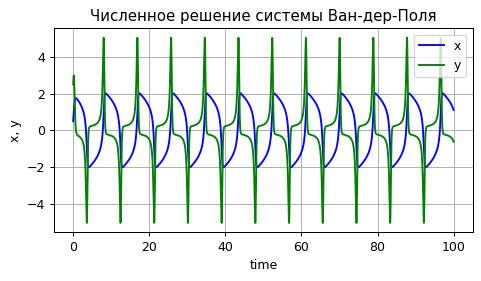

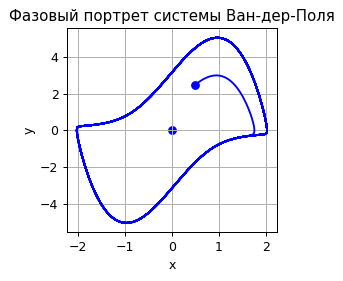

In [ ]:
analyze(vanderpol, nulls, starts, mu=1.5)

<font size=5>***Таким образом, при *0 < mu < 1* особая точка - неустойчивый фокус.
А при *mu > 1* особая точка - неустойчивый узел.***